# 6 - Viés-Variância

In [2]:
import scipy.io

mat = scipy.io.loadmat('am-T1-dados/ex5data1.mat')

X = mat["X"]
y = mat["y"]
Xval = mat["Xval"]
yval = mat["yval"]
Xtest = mat["Xtest"]
ytest = mat["ytest"]

m = X.shape[0]


In [3]:
import numpy as np

def linearRegCostFunction(X, y, theta, lambda_val, return_grad=False):
    # Initialize some useful values
    m = len(y) # number of training examples

    # force to be 2D vector
    theta = np.reshape(theta, (-1,y.shape[1]))

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # cost function
    J = ( 1./(2*m)) * np.power( (np.dot(X, theta) - y) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()

    # regularized gradient
    grad = (1./m) * np.dot( X.T, np.dot(X,theta) - y) + ( float(lambda_val) / m )*theta

    # unregularize first gradient
    grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - y)
    grad[0] = grad_no_regularization[0]

    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 

In [4]:
import numpy as np
from scipy.optimize import minimize


def learningCurve(X, y, Xval, yval, lambda_val):
    m = len(X)
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))

    for i in range(1,m+1):
        X_train = X[:i]
        y_train = y[:i]
        
        initial_theta = np.zeros((X.shape[1], 1))

        def costFunc(theta):
            return linearRegCostFunction(X_train, y_train, theta, lambda_val, True)

        maxiter = 200
        results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)

        theta = results["x"]

        error_train[i-1] = linearRegCostFunction(X_train, y_train, theta, 0)
        error_val[i-1]   = linearRegCostFunction(Xval   , yval   , theta, 0)
                
    return error_train, error_val

In [5]:
lambda_val = 0
error_train, error_val = learningCurve(np.column_stack((np.ones((m,1)), X)), y, np.column_stack((np.ones((Xval.shape[0], 1)), Xval)), yval, lambda_val)


In [7]:
error_val


array([[205.12109575],
       [110.30036611],
       [ 45.01023138],
       [ 48.36891145],
       [ 35.86516475],
       [ 33.8299616 ],
       [ 31.9709858 ],
       [ 30.86244632],
       [ 31.13599796],
       [ 28.93620747],
       [ 29.55143162],
       [ 29.43381813]])

[0, 13, 0, 150]

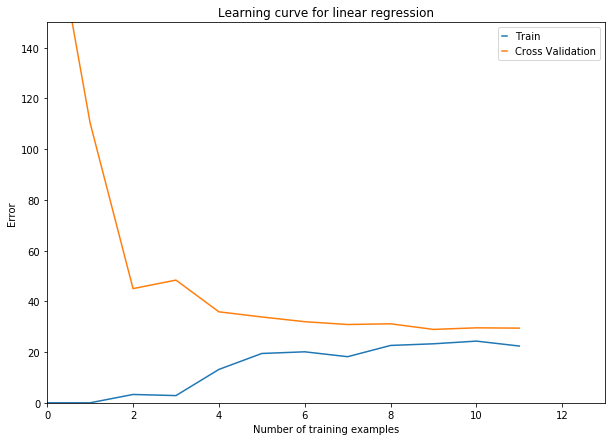

In [38]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
p1, p2 = plt.plot(range(m), error_train, range(m), error_val)
plt.title('Learning curve for linear regression')
plt.legend((p1, p2), ('Train', 'Cross Validation'), numpoints=1, handlelength=0.5)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])